## FMB552 금융  데이터베이스 - Week 1 실습과제

## 우지환 (학번: 20204654)

In [68]:
print('Hello world!')

Hello world!


## 1. 수식 입력하기

$$
x+y = 3 \\
x-y = 1 \\
\therefore x=2, y=1
$$

## 근의 공식

$$
a x^2 + b x + c = 0
$$

$$
\therefore x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}
$$

## 2. DCF로 NPV 계산하기

$$
\text{NPV}= \sum_{t=0}^T \frac{\text{CF}_t}{(1+r)^t}
$$

In [26]:
face = 1000
T = 5
c = 0.05
r = 0.02

In [27]:
NPV = 0

for t in range(1, T+1):
    CF = face * c
    PV = CF / (1+r) **t
    print('t = {}, CF ={}, PV={:.2f}'.format(t, CF, PV))
    NPV += PV

NPV += face / (1+r)**T

print('')
print('NPV: {:.2f}'.format(NPV))

t = 1, CF =50.0, PV=49.02
t = 2, CF =50.0, PV=48.06
t = 3, CF =50.0, PV=47.12
t = 4, CF =50.0, PV=46.19
t = 5, CF =50.0, PV=45.29

NPV: 1141.40


In [28]:
PVs = [face * c / (1+r)**t for t in range(1, T+1)]

In [29]:
NPV_short = sum(PVs) + face / (1+r)**T

In [30]:
print('NPV_short: {:.2f}'.format(NPV_short))

NPV_short: 1141.40


## 3. IRR 계산하기

In [31]:
face = 1000
T = 5
c = 0.05
price = 1130

In [32]:
def compute_npv(r):
    npv = sum([face * c / (1+r)**t for t in range(1, T+1)])\
    + face/(1+r)**T
    return npv

In [33]:
compute_npv(0.02)

1141.4037852551262

In [34]:
print('NPV if r = 5%: {:.2f}'.format(compute_npv(0.05)))

NPV if r = 5%: 1000.00


In [35]:
print('NPV if r = 3%: {:.2f}'.format(compute_npv(0.03)))

NPV if r = 3%: 1091.59


In [36]:
print('NPV if r = 2%: {:.2f}'.format(compute_npv(0.02)))

NPV if r = 2%: 1141.40


In [37]:
from scipy import optimize

In [38]:
def f(r):
    return compute_npv(r) - price

In [45]:
sol  = optimize.root_scalar(f, bracket=[0.02, 0.05])

In [46]:
sol

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.022239858418681407

In [48]:
print('Solution: {:.4f}%'.format(sol.root * 100))

Solution: 2.2240%


In [59]:
temp = [1,2,3]
print(temp)
temp = {1, 2, 3}
print(temp)
temp = (1, 2, 3)
print(temp)

temp[0]

[1, 2, 3]
{1, 2, 3}
(1, 2, 3)


1

## 4. 그래프 그리기

In [60]:
min_ytm = 0
max_ytm = 0.10
steps = 100

In [92]:
ytm = [min_ytm + (max_ytm - min_ytm) * x /steps for x in range(steps)]

In [93]:
npv = [compute_npv(x) for x in ytm]

In [94]:
%matplotlib inline 

In [95]:
import matplotlib.pyplot as plt

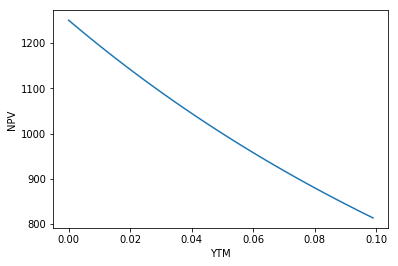

In [96]:
plt.plot(ytm, npv)
plt.xlabel('YTM')
plt.ylabel('NPV')
plt.show()

In [97]:
import numpy as np

In [98]:
hor = np.zeros(steps) + face

In [99]:
ver= np.zeros(steps) + c

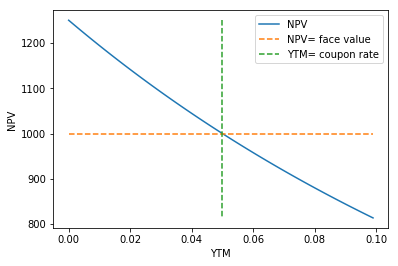

In [101]:
plt.plot(ytm, npv, label='NPV')
plt.plot(ytm, hor, linestyle='dashed', label='NPV= face value')
plt.plot(ver, npv, linestyle='dashed', label='YTM= coupon rate')
plt.xlabel('YTM')
plt.ylabel('NPV')
plt.legend()
plt.show()